# <center><u>Modeling of Strength of High Performing Concrete</u></center>

### Data Description:
Concrete is the most important material in civil engineering. The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).
### File Name: 
concrete.csv
### Objective:
The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly superplasticizer, coarse aggregate, and fine aggregate. So the purpose is to create models using the data to observe the strength of high performance concrete using Machine Learning.
### Analysis By:
Soumalya Biswas (Group-3)

# ============================================================

### Importing the necessary libraries to analyse data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train-Test data spliting library
from sklearn.model_selection import train_test_split
# Logistic Regression, Ridge, Lasso library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# zscore library
from scipy.stats import zscore
# Preprocessing library
from sklearn import preprocessing
# KFold library
from sklearn.model_selection import KFold
# Cross Validation library
from sklearn.model_selection import cross_val_score
# Grid Searching and Radomsearching library
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Polynomial Featuring Library
from sklearn.preprocessing import PolynomialFeatures
# Support Vector Machine Regressor library
from sklearn.svm import SVR
# Print library
from pprint import pprint
#boostrapping resampling library
from sklearn.utils import resample
#kmeans clustering library
from sklearn.cluster import KMeans
#Random Forest Regressor, GradientBoostingRegressor, AdaBoostRegressor library
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
#KNeighborsRegressor library
from sklearn.neighbors import KNeighborsRegressor
#DecisionTreeRegressor library
from sklearn.tree import DecisionTreeRegressor

<b>Comment:</b> 
* Importing the pandas library to access the dataframe.
* For graphical representation I used seaborn and matplotlib.
* Numpy library used to calculate and access array
* For spliting data used `train_test_split` function from `model_selection` library of `sklearn`
* For logistic regression using `LogisticRegression`, `Ridge`, `Lasso` function of `sklearn` `linear_model` library
* For scaling the data using `preprocessing` library of `sklearn`
* For support vactor model using `SVR` function of `sklearn` `svm` library
* For standardizing the data using `zscore` function of `scipy` `stats` library
* For hyper perameter tuning using `GridSearchCV` and `RandomsearchCV` function of `sklearn` `model_selection` library
* For Ensemble Learning the data using `RandomForestRegressor`,`GradientBoostingRegressor`,`AdaBoostRegressor` library of `ensemble`

### Reading the data as a data frame

In [2]:
dataset_df = pd.read_csv('concrete.csv')
dataset_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


<b>Comment:</b> Read the data from concrete.csv file using pandas function called read_csv and stored the dataframe in variable named dataset_df. Also displayed the first 5 row of the data from dataframe using head function.

### Understanding of Data Attributes
  Checked the dataset separately with excel editor. Added filter in each column to understand the nature of the data.
  
<b><u>Interval Vriables :</u></b>
  * <b>Cement : </b> This column represents the cement ingredient which measured in kg in a m3 mixture.
  * <b>Blast/slag : </b> This column represents the blast ingredient which measured in kg in a m3 mixture.
  * <b>Fly ash : </b> This column represents the fly ash ingredient which measured in kg in a m3 mixture.
  * <b>Water : </b> This column represents the water ingredient which measured in kg in a m3 mixture.
  * <b>Superplasticizer : </b> This column represents the superplasticizer ingredient which measured in kg in a m3 mixture.
  * <b>CoarseAggregate : </b> This column represents the coarse aggregate which measured in kg in a m3 mixture.
  * <b>FineAggregate : </b> This column represents the fine aggregate which measured in kg in a m3 mixture.
  * <b>Age : </b> This column represents the age of the concrete (in days (1~365)).
  * <b>strength : </b> This is our target variable. The strength of the concrete which measured in MPa.
 

### Performing the basic EDA

* <b><u>Shape of the data</u></b>

In [3]:
rows, columns = dataset_df.shape
print(f'There are {rows} rows and {columns} columns in the dataframe.')

There are 1030 rows and 9 columns in the dataframe.


* <b><u>Checking the length of the index of the data</u></b>

In [4]:
len(dataset_df.index)

1030

<b>Comment:</b> Found the row size and the index sizes are equal which is 1030 in the dataset against the columns size 9.

* <b><u>Checking the data type of each attribute</u></b>

In [5]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
dataset_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

<b>Comment: </b> I can see out of 9 column there is 1 Discrete Variable values column available.
 * 8 Float type (`cement`, `slag`, `ash`, `water`, `superplastic`, `coarseagg`, `fineagg`, `strength`)
 * 1 Integer type (`age`)

* <b><u>Checking the unique value</u></b>

In [7]:
dataset_df.apply(lambda x: len(x.unique()))

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

<b>Comment : </b> For checking the unique value I used unique function of pandas and applied through the dataframe with the helpof lambda function.
 
 * All of the attributes are having sets of numbers.

* <b><u>Checking the presence of missing values</u></b>

In [8]:
dataset_df.isnull().values.any()

False

In [9]:
dataset_df.isna().values.any()

False

In [10]:
dataset_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
dataset_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<b>Comment:</b> I found there is no missing values in the dataframe. For that I used isnull and isna function of dataframe and there I checked if any isnull or isna values present or not. I found False return. And also checked the sum of null and sum of na values on each attribute which is 0 in our dataset.

Also for more evidence, if I look at the above info function output it's showing me all equal distribution of rows in between different data types. So, I can say there is no missing values in this dataset.

* <b><u>Key Characteristics of Numerical data</u></b>

In [12]:
five_points_summury = dataset_df.describe().T
five_points_summury

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


* Mean and the median is nearly same for the `cement, water, superplastic, coarseagg, fineagg, strength` so we can say it is approximately normally distributed.
* `slag, ash, age` are having much values at the max portion, I can say it is skewed towards right side.

* <b><u>5 point summary of numerical attributes</u></b>

In [13]:
five_points_summury[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
cement,102.00,192.375,272.900,350.000,540.0
slag,0.00,0.000,22.000,142.950,359.4
ash,0.00,0.000,0.000,118.300,200.1
water,121.80,164.900,185.000,192.000,247.0
superplastic,0.00,0.000,6.400,10.200,32.2
coarseagg,801.00,932.000,968.000,1029.400,1145.0
fineagg,594.00,730.950,779.500,824.000,992.6
age,1.00,7.000,28.000,56.000,365.0
strength,2.33,23.710,34.445,46.135,82.6


<b>Comment:</b> I used describe function of dataframe to determine the 5 point summary of numerical attributes. Applied transpose to the result and stored in a variable called five_points_summury.

Here We can see the key characteristics of our numerical datas like mean, standard deviation  of attributes. 

Then I displayed the 5 point summury where some important insights I found like min and max values of numerical attributes which will help me in my next analysis.



### Outlier Checking

Used seaborn boxplot function to observe and display the outliers

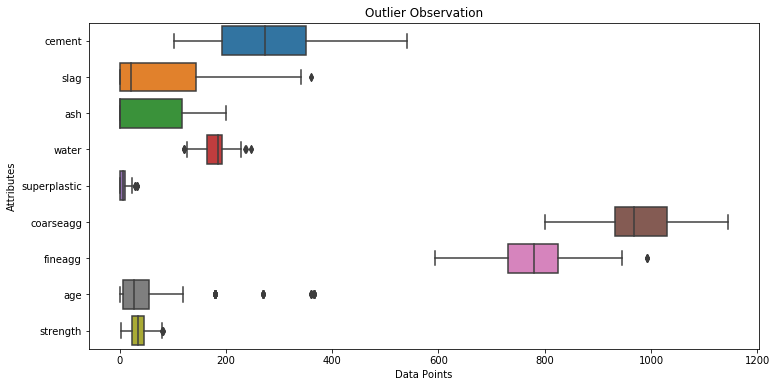

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset_df, orient='h')
plt.title('Outlier Observation')
plt.xlabel('Data Points')
plt.ylabel('Attributes')
plt.show()

<b>Comment: </b> From the above ploting I can say `slag`, `water`, `superplastic`, `fineagg` and `age` column are having clear outliers. Let see these plots separately.

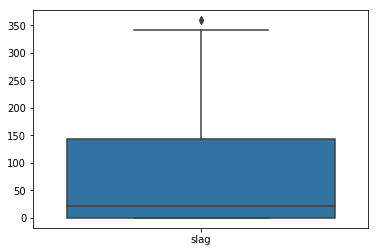

In [15]:
# Boxplot implementation for `slag`
sns.boxplot(data=dataset_df[['slag']])
plt.show()

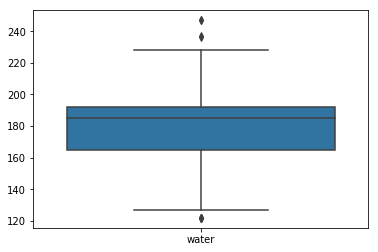

In [16]:
# Boxplot implementation for `water`
sns.boxplot(data=dataset_df[['water']])
plt.show()

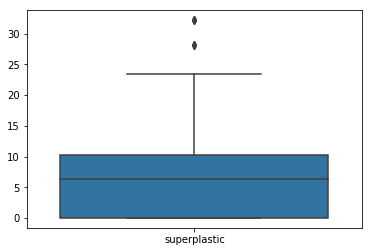

In [17]:
# Boxplot implementation for `superplastic`
sns.boxplot(data=dataset_df[['superplastic']])
plt.show()

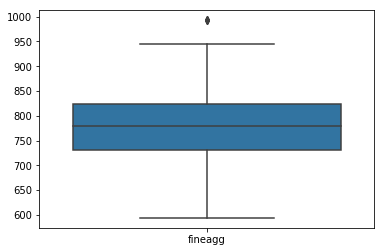

In [18]:
# Boxplot implementation for `fineagg`
sns.boxplot(data=dataset_df[['fineagg']])
plt.show()

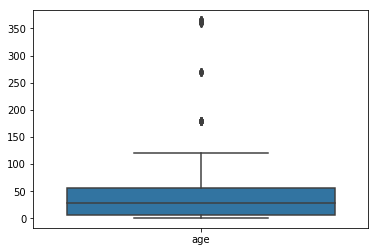

In [19]:
# Boxplot implementation for `age`
sns.boxplot(data=dataset_df[['age']])
plt.show()

<b>Comment: </b>  Above graphs are the representation of `slag`, `water`, `superplastic`, `fineagg` and `age` column boxplot graph respectively. All of them are having clear outliers.

<u>From above individual box plot graph,</u><br>
 a. Bottom black horizontal line of box plot is minimum value.<br>
 b. First black horizontal line of rectangle shape of box plot is First quartile or 25%<br>
 c. Second black horizontal line of rectangle shape of box plot is Second quartile or 50% or median.<br>
 d. Third black horizontal line of rectangle shape of box plot is third quartile or 75%<br>
 e. Top black horizontal line of rectangle shape of box plot is maximum value.<br>
 f. Small diamond shape of box plot is <b>outlier data</b>.

### Relation between Individual attributes

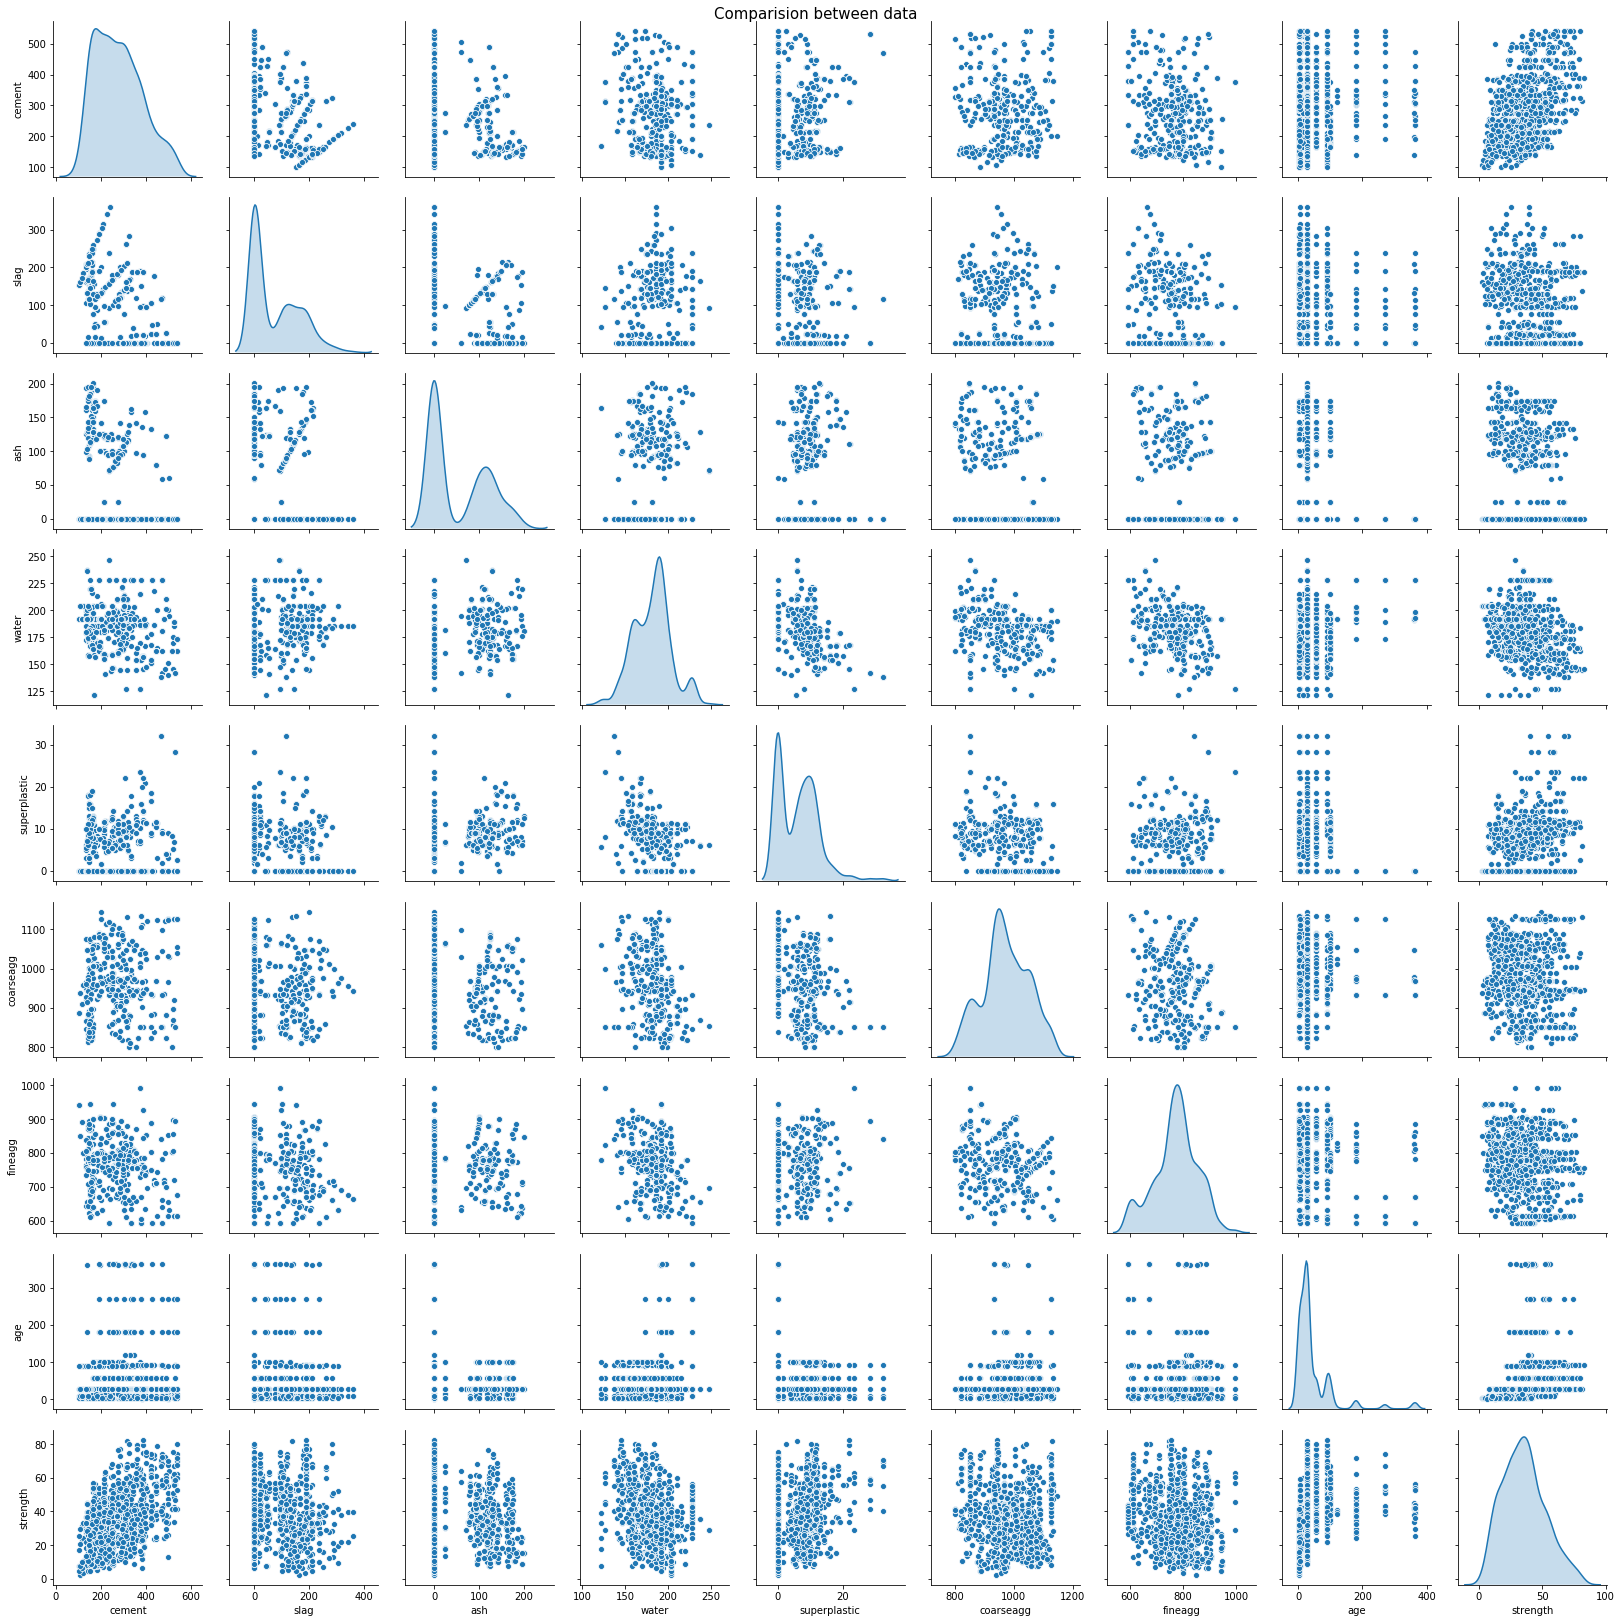

In [20]:
sns.pairplot(dataset_df, diag_kind='kde')
plt.suptitle('Comparision between data', y=1,size=15)
plt.show()

<b> Comment: </b> I used seaborn pairplot function to check the relation between individual attributes.

<b> Few interesting facts: </b>
- `strength` have some possitive linear relation with `cement` and some with `superplastic` that means if the quantity of cement or superplastic is more then concrete is having more strength.
- More strength is between 20-150 days aprox.
- Strength is again decreasing again after 250 days approx.
- Also It is quite visible multiple gaussian `slag`,`ash`,`water`, `superplastic`, `age`.
- `slag`, `cement` and `ash` also have a tendency to create linear relation but it's not prominant.
- Rest of the relation between other individual attributes are mostly formed cloud shape or symmetrical shape.


#### Strength of Concrete column distribution

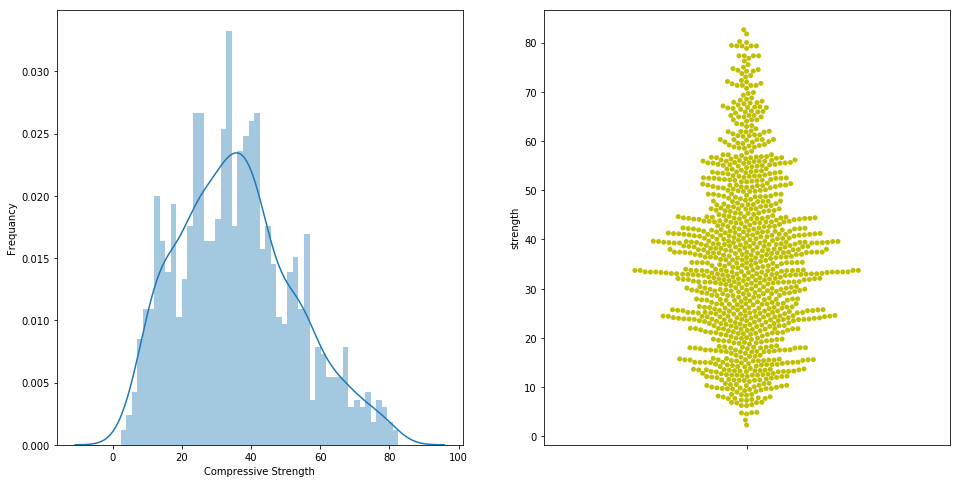

In [21]:
# class Column distribution
fig1 = plt.figure(figsize=(16, 8))
fig1.add_subplot(1,2,1)
sns.distplot(dataset_df['strength'], bins=50, hist_kws={'alpha': 0.4})
plt.xlabel('Compressive Strength')
plt.ylabel('Frequancy')

fig1.add_subplot(1,2,2)
sns.swarmplot(dataset_df['strength'],orient='v',color='y')
plt.show()

<b> Comment: </b> I can clearly see that our target variable is having continuous values which representing the comprehensive strength. And the guassian is normal except a slight peak on the left.

### Comparing other attributes against strength column to check the influence

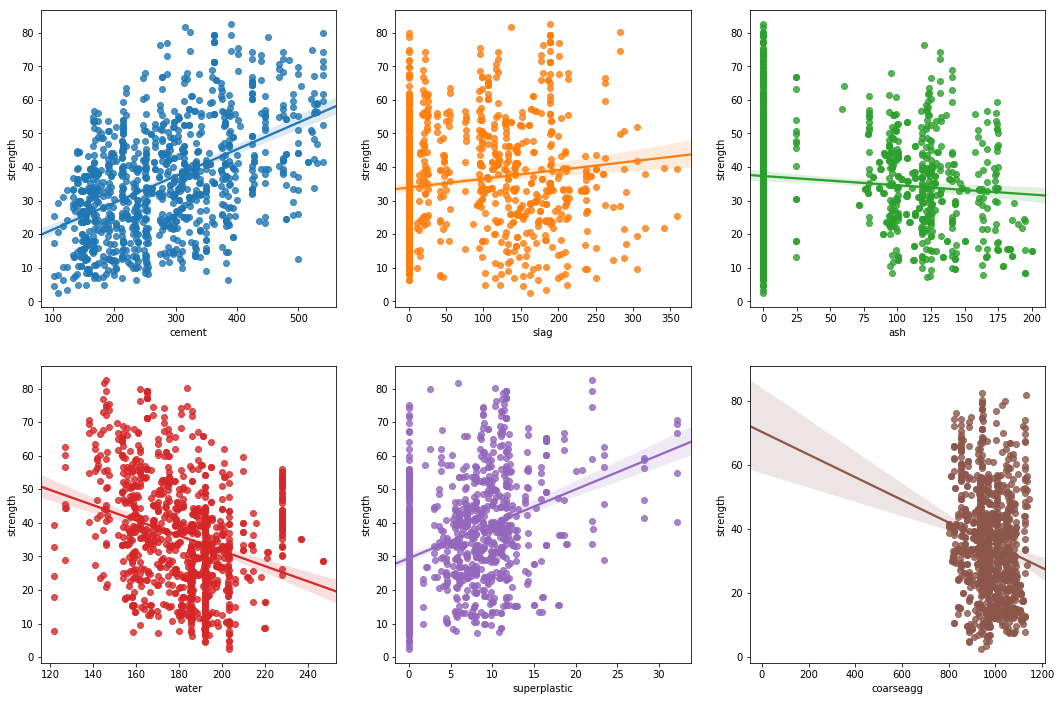

In [22]:
features_to_analyse = dataset_df.columns[:7]
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='strength', data = dataset_df, ax=ax)

<b> Comment: </b> I can clearly see that the strongest relation in between independent and dependent attributes is  
- cement
- ash
- slag
- water
 
`cement` and `slag` have positive corelation with concrete strength.
`ash` and `water` have negative relation with concrete strength.

### Comparing age attributes against strength column to check the influence

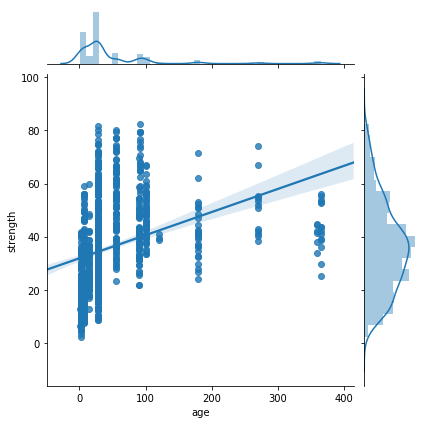

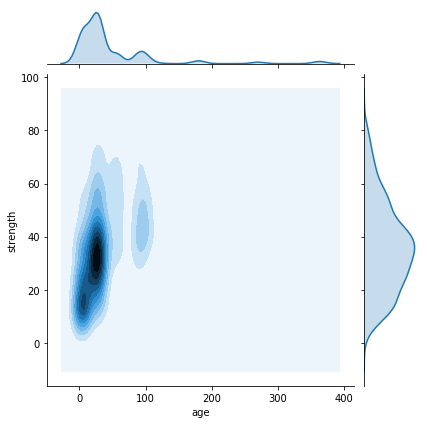

In [23]:
sns.jointplot(x='age',y='strength',data=dataset_df, kind='reg')
plt.show()
sns.jointplot(x='age',y='strength',data=dataset_df, kind='kde')
plt.show()

<b> Comment: </b> Above graphs showing the influence on strength over `age` column. First one we checked the regression and second graph is showing density.
 
* I can notice two gaussian of age.
* More over concrete age with 30-50 days and strength with 20-40 mpa range is the majority.

### Corelation checking

* Checking the corelation using pandas corr() function

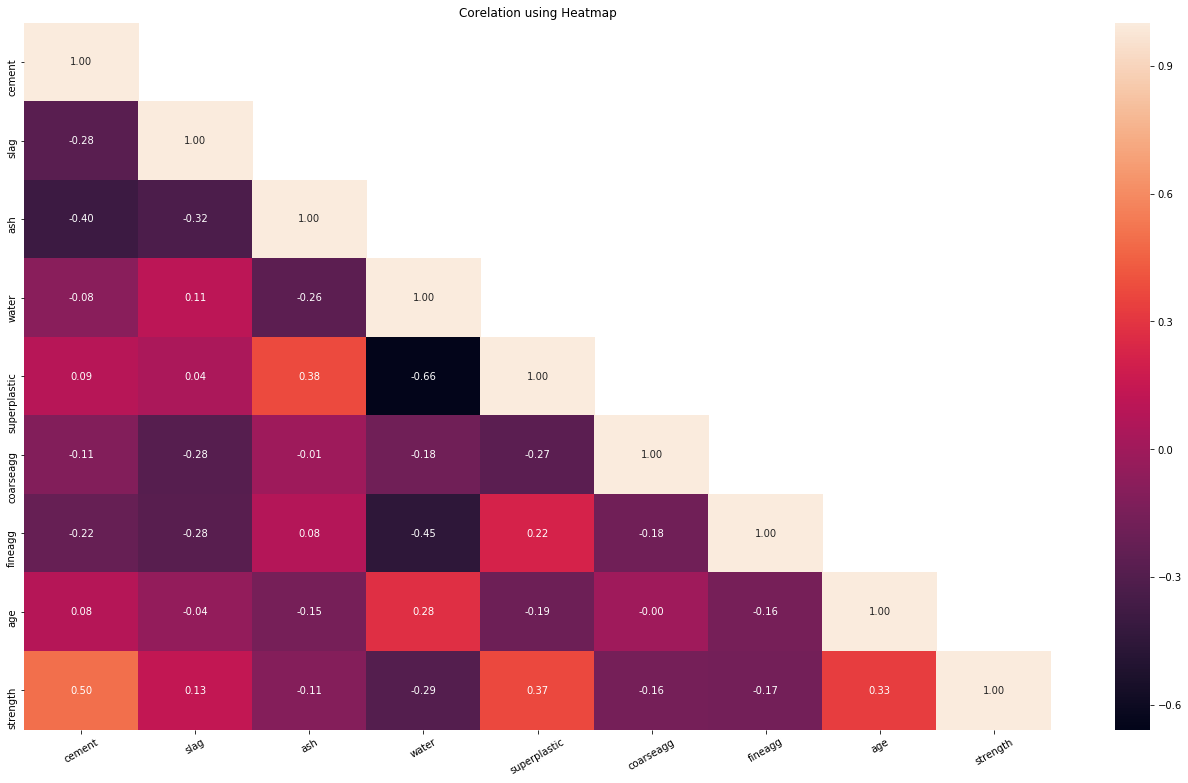

In [24]:
corr = dataset_df.corr()
plt.figure(figsize=(23,13))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
hmap = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=30)
plt.title('Corelation using Heatmap')
plt.show()

<b>Comment: </b> 

This 'Concrete' dataset providing us some interesting facts about the relation between the attributes which is quite well correlated.

<u>There is some correlation between the attributes.</u>
* `ash` and `cement` are having corelation of `-0.40` .
* `superplastic` and `water` are having corelation of `-0.66` .
* `fineagg` and `water` are having corelation of `-0.45` .


### Removing Outliers

In [25]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [26]:
dataset_df = outlier_detect(dataset_df)

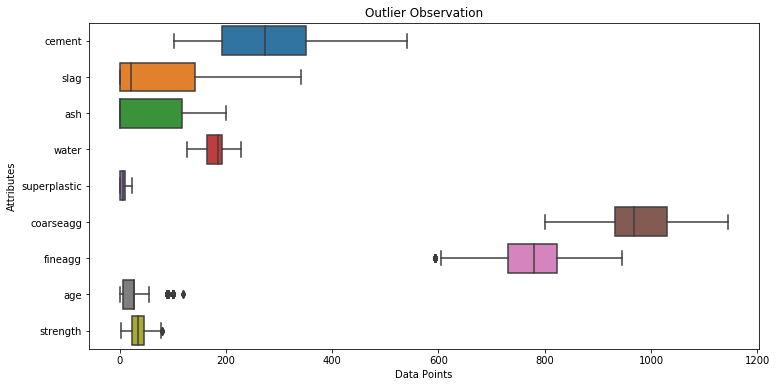

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset_df, orient='h')
plt.title('Outlier Observation')
plt.xlabel('Data Points')
plt.ylabel('Attributes')
plt.show()

In [28]:
dataset_df.index

RangeIndex(start=0, stop=1030, step=1)

<b>Comment: </b> Above code I used to detect the outliers and remove it. For that I used a function named `outlier_detect` which creates the lower and upper limit and accordingly I replaced the outliers with median value. 

After the process I varified if the outliers removed or not. So found outliers most of the outliers are removed but as we are sharpen the gaussian by replacing it with median value, the attributes exposed with new outliers. But we can igore thses new outliers for now.

<hr>

## Data Preprocessing

* <b>Applying z-score to standardizing the data</b>

In [29]:
XScaled = dataset_df.apply(zscore)
XScaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159,-0.349209
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933,-0.736906
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159,-0.389923
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159,0.620640
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159,-1.054112


<b> Comments: </b> Here we applied zscore to the dataset to standardize the data and saved the  the dataframe in a variable called `XScaled`. Also checked the scaled data with dataframe head() function.

<hr>

## <center><u>:: KMeans Clustering (Checking clusters in dataset) ::</u></center>

We visualiszed few clusters with pairplot. Assuming there might have 3-6 clusters. So we need to check if those are really important.

In [30]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(XScaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7560.924257
2,3,6372.589714
3,4,5583.385533
4,5,5110.807867
5,6,4653.990757
6,7,4239.114028
7,8,3969.445194
8,9,3752.841424
9,10,3561.261360


<b>Checking the cluster error through elbow plot</b>

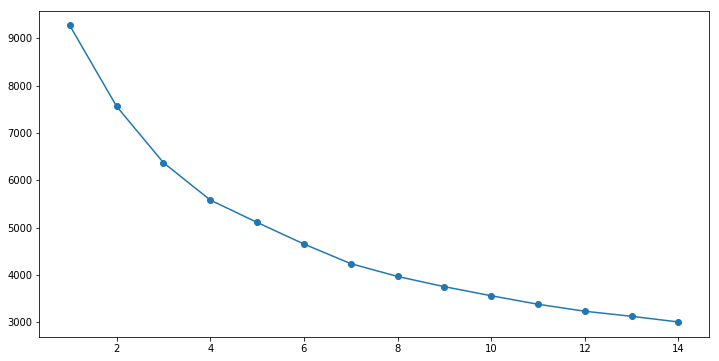

In [31]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

<b>Comment: </b> From the above graph we can assume the number of cluster is 5-6. 

In [32]:
# Excuting the kmeans function with 6 cluster.
kmeans = KMeans(n_clusters = 6)
kmeans.fit(XScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
# Checking the bincounts of the cluster labels generated from kmeans

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[187 181  91 133 268 170]


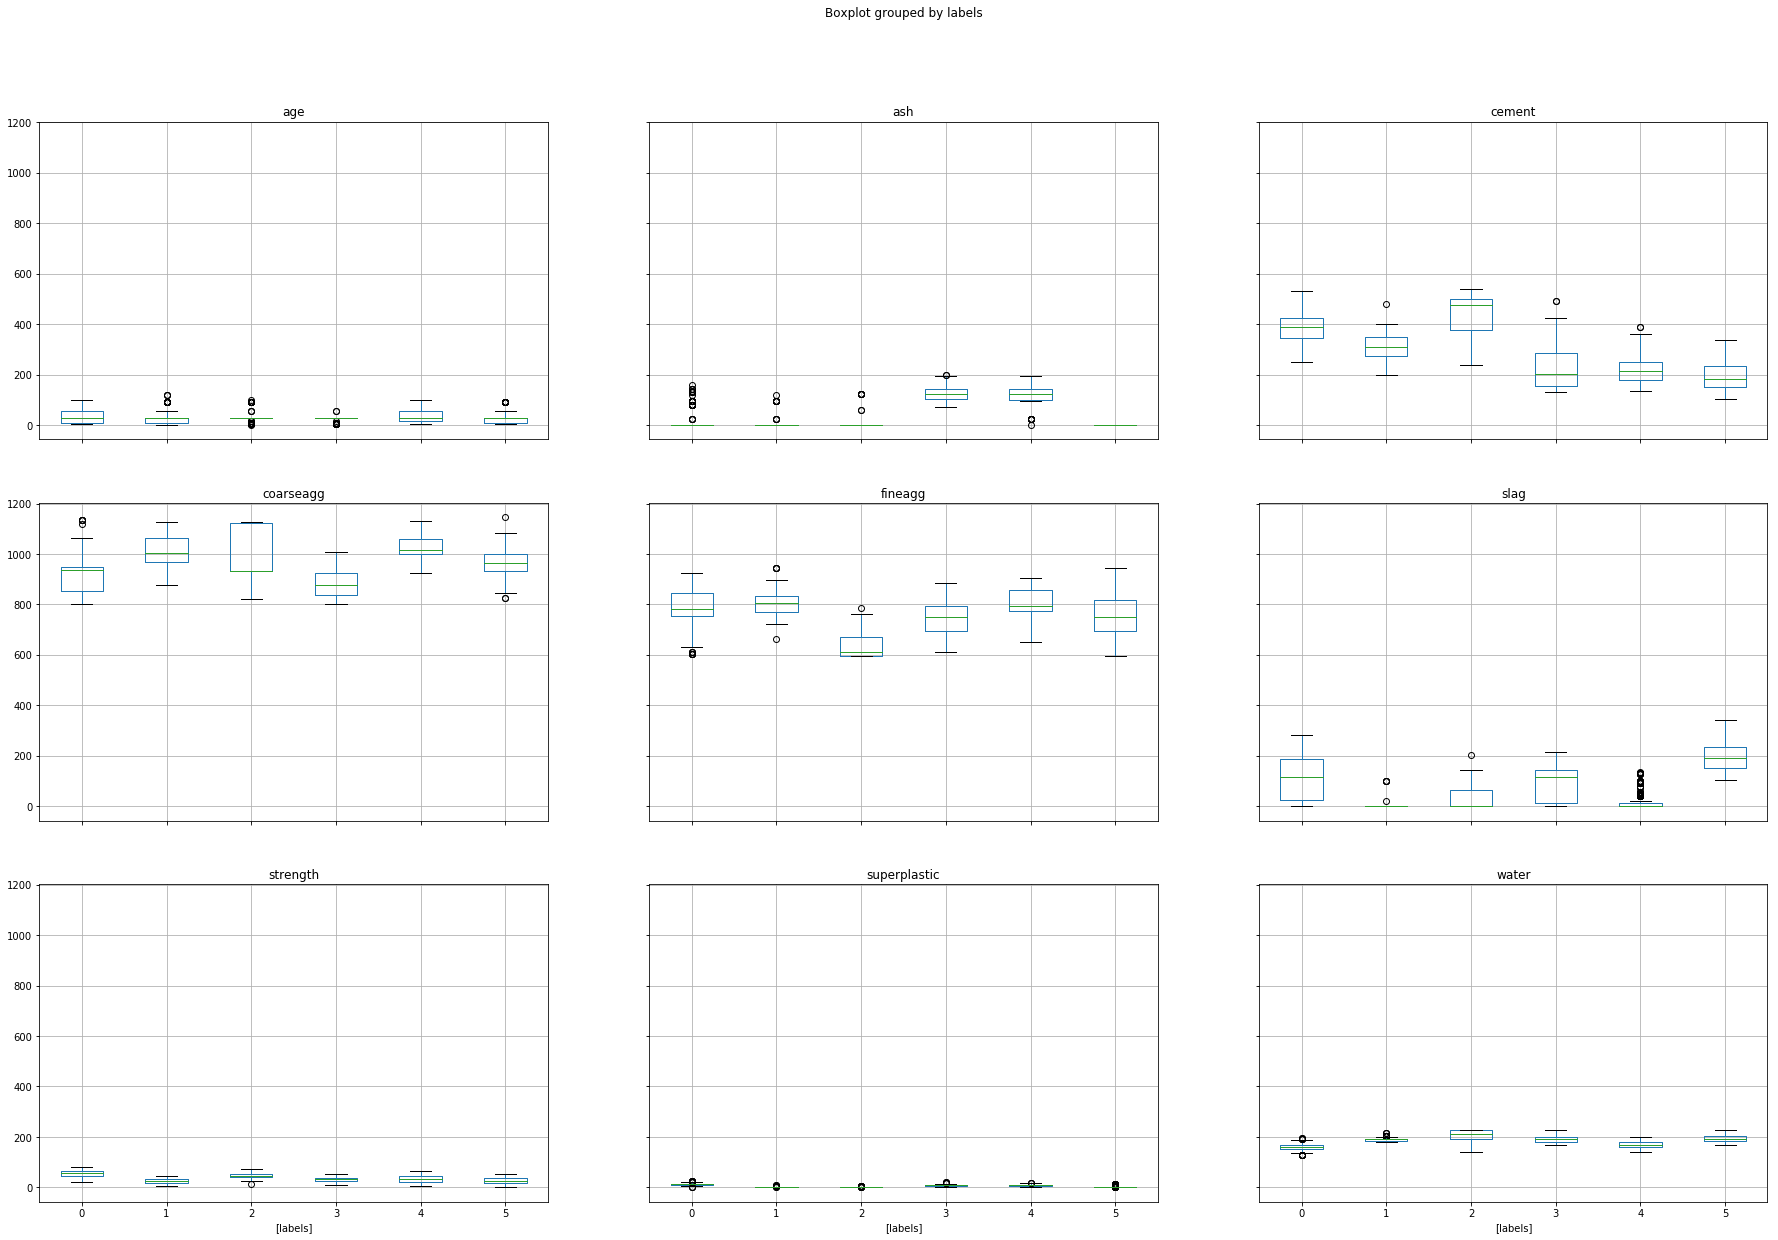

In [34]:
# creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
concrete_df_labeled = dataset_df.join(cluster_labels)
concrete_df_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20))
plt.show()

<b>Comment: </b> So I can't see any distinct clusters are visible at any number of clusters. Looks like the attributes are weak predictors except for cement. 


<b>There is no point of breaking data into clusters and better results by it to achive desired result.</b>


<hr/>

## <center><u>:: Model Building ::</u></center>

<b><u>Train, Validation and Test data spliting (Scaled Data)</u></b>

We are going to create 3 part of our dataset. We'll be working working test and validation data. And one part of data will be kept for Test the final score of our models.

* Data spliting into train for model and test set with the scaled dataset

In [35]:
y_set = XScaled[['strength']]
X_set = XScaled.drop(labels= "strength" , axis = 1)

# data spliting using 80:20 train test data ratio and randon seeding 7
X_model_train, X_test, y_model_train, y_test = train_test_split(X_set, y_set, test_size=0.20, random_state=7)

In [36]:
X_model_train.shape

(824, 8)

Split the dataframe into 80 and 20 ratio for training and testing dataset respectively. 
 * I have used `X_model_train, X_test, y_model_train, y_test` these splited variable.

<b><u>Train and validate data spliting</u></b>

* Data spliting into train and validate set with the scaled dataset

In [37]:
X_train = X_model_train
X_validate = X_test
y_train = y_model_train
y_validate = y_test

In [38]:
X_train.shape

(824, 8)

Split the dataframe into 70 and 30 ratio for training and validate dataset respectively. 
 * I have used `X_train, X_validate, y_train, y_validate` these splited variable.

<hr>


### <center><u>Comparing the different model performance metrics</u></center>

In [39]:
Model = []
RMSE = []
R_sq = []

# Defining the kFold function for the cross validation
n_split = 10
randon_state = 7
kfold = KFold(n_split, random_state = randon_state)

* Defination of the function to comparing models

In [40]:
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=kfold, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=kfold, scoring='r2').mean())

<b>Comment: </b> Above function uses to append the cross validation scores of the algorithms.

In [41]:
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor', 'Support Vector Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(), 
          AdaBoostRegressor(), SVR(gamma='auto')]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train.values.ravel())

In [42]:
compare_model_df = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("BELOW ARE THE TRAINING SCORES: ")
compare_model_df

BELOW ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,0.565191,0.677320
1,Ridge Regression,0.565177,0.677358
2,Lasso Regression,1.008030,-0.022967
3,K Neighbors Regressor,0.494626,0.749695
4,Decision Tree Regressor,0.429116,0.816164
5,Random Forest Regressor,0.347140,0.877625
6,Gradient Boosting Regressor,0.372604,0.859091
7,Adaboost Regressor,0.505979,0.733703
8,Support Vector Regressor,0.393081,0.842574


In [43]:
compare_model_df[(compare_model_df['RMSE'] == compare_model_df['RMSE'].min()) & (compare_model_df['R Squared'] == compare_model_df['R Squared'].max())]

,Model,RMSE,R Squared
5,Random Forest Regressor,0.34714,0.877625


<b>Comment: </b> I found the <b>Random Forest Regressor</b> is having lowest Root Mean Square Error (RMSE) and Higest R Square value. So, I can say it is the best model to execute our model. 

But still I want to check linear regression, ridge and lasso model again after changing the dataset features into polynomial features.

<hr>

In [44]:
linear_model = []
linear_model_score = []
linear_model_RMSE = []
linear_model_R_2 = []

### <center><u>Linear Regression Model</u></center>

In [45]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
linear_model.append('Linear Regression')

# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    

print("=========================================")
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

print("=========================================")

# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
print("=========================================")
print("Linear Regression Model Score:")
print("=========================================")
lr_score = regression_model.score(X_validate, y_validate)
linear_model_score.append(lr_score)
print(lr_score)


print("=========================================")
print("Linear Regression Model RMSE :") 
print("=========================================")
lr_rmse = np.sqrt((-1) * cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(lr_rmse)

linear_model_RMSE.append(lr_rmse)


print("=========================================")
print("Linear Regression Model R-Square Value :") 
print("=========================================")
lr_r2 = cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print(lr_r2)


linear_model_R_2.append(lr_r2)

The coefficient for cement is 0.594294865522345
The coefficient for slag is 0.3241865164460312
The coefficient for ash is 0.13248898504165027
The coefficient for water is -0.23297012172064122
The coefficient for superplastic is 0.06657760157794536
The coefficient for coarseagg is -0.053487965558891605
The coefficient for fineagg is -0.098403622690671
The coefficient for age is 0.5132650154248938
The intercept for our model is -0.0014869471490705213
Linear Regression Model Score:
0.7524416027229521
Linear Regression Model RMSE :
0.5651912090914709
Linear Regression Model R-Square Value :
0.6773202680703881


<hr>

### <center><u>Polynomialc(2D) Featuring Model</u></center>

Since on many dimensions, the relationship is not really linear, let us try polynomial models (quadratic)

In [46]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_validate)
print("Shape", X_train_.shape)
linear_model.append('Polynomial Features - 2D')

poly_clf = LinearRegression()

poly_clf.fit(X_train_, y_train)

print("=========================================")
print("2D Polynomial Model Score:")
print("=========================================")
pf_score = poly_clf.score(X_test_, y_validate)
print(pf_score)
linear_model_score.append(pf_score)

print("=========================================")
print("2D Polynomial Model RMSE :") 
print("=========================================")
pf_rmse = np.sqrt((-1) * cross_val_score(poly_clf, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(pf_rmse)
linear_model_RMSE.append(pf_rmse)

print("=========================================")
print("2D Polynomial Model R-Square Value :") 
print("=========================================")
pf_r2 = cross_val_score(poly_clf, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
linear_model_R_2.append(pf_r2)
print(pf_r2)

Shape (824, 37)
2D Polynomial Model Score:
0.7905540740965018
2D Polynomial Model RMSE :
0.5282597364604747
2D Polynomial Model R-Square Value :
0.7164978744548325


<hr>

### <center><u>Polynomial(3D) Model</u></center>

In [47]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train__ = poly.fit_transform(X_train)
X_test__ = poly.fit_transform(X_validate)
print("Shape", X_train__.shape)
linear_model.append('Polynomial Features - 3D')

poly_clf_3d = LinearRegression()

poly_clf_3d.fit(X_train__, y_train)

print("=========================================")
print("3D Polynomial Model Score:")
print("=========================================")
pf3_score = poly_clf_3d.score(X_test__, y_validate)
print(pf3_score)
linear_model_score.append(pf3_score)

print("=========================================")
print("3D Polynomial Model RMSE :") 
print("=========================================")
pf3_rmse = np.sqrt((-1) * cross_val_score(poly_clf_3d, X_train__, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(pf3_rmse)
linear_model_RMSE.append(pf3_rmse)

print("=========================================")
print("3D Polynomial Model R-Square Value :") 
print("=========================================")
pf3_r2 = cross_val_score(poly_clf_3d, X_train__, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print(pf3_r2)
linear_model_R_2.append(pf3_r2)

Shape (824, 93)
3D Polynomial Model Score:
0.7627025547890659
3D Polynomial Model RMSE :
0.5391757434472082
3D Polynomial Model R-Square Value :
0.7045970717625287


<hr>

### <center><u>Regularized - Ridge Model</u></center>

* Applying Ridge model over 2d polynomial Featuring data

In [48]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
linear_model.append('Ridge - with general data')
print("Coefficients of the Ridge model")
print("=========================================")
print (ridge.coef_)
print("=========================================")
print("Ridge Model Score:")
print("=========================================")
rid_score = ridge.score(X_validate, y_validate)
linear_model_score.append(rid_score)
print(rid_score)
print("=========================================")
print("Ridge Model RMSE :") 
print("=========================================")
rig_rmse = np.sqrt((-1) * cross_val_score(ridge, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(rig_rmse)
linear_model_RMSE.append(rig_rmse)
print("=========================================")
print("Ridge Model R-Square Value :") 
print("=========================================")
rid_r2 = cross_val_score(ridge, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print(rid_r2)
linear_model_R_2.append(rid_r2)


print("----------------------------------------------------------------------------------")
ridge_pf2 = Ridge(alpha=.3)
ridge_pf2.fit(X_train_,y_train)
linear_model.append('Ridge - with 2d Polynomial features')
print("Coefficients of the Ridge Model - with 2d Polynomial features")
print("=========================================")
print (ridge_pf2.coef_)
print("=========================================")
print("Ridge Model (2d Polynomial features) Score:")
print("=========================================")
rid_score = ridge_pf2.score(X_test_, y_validate)
linear_model_score.append(rid_score)
print(rid_score)
print("=========================================")
print("Ridge Model (2d Polynomial features) RMSE :") 
print("=========================================")
rig_rmse = np.sqrt((-1) * cross_val_score(ridge_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(rig_rmse)
linear_model_RMSE.append(rig_rmse)
print("=========================================")
print("Ridge Model (2d Polynomial features) R-Square Value :") 
print("=========================================")
rid_r2 = cross_val_score(ridge_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print(rid_r2)
linear_model_R_2.append(rid_r2)

Coefficients of the Ridge model
[[ 0.59274185  0.32271777  0.13117504 -0.23367013  0.06678415 -0.05431875
  -0.09947685  0.51308025]]
Ridge Model Score:
0.7523855578936285
Ridge Model RMSE :
0.5651855438009662
Ridge Model R-Square Value :
0.6773332646295728
----------------------------------------------------------------------------------
Coefficients of the Ridge Model - with 2d Polynomial features
[[ 0.          0.68357793  0.47231509  0.19660644 -0.20045124  0.07394197
  -0.02490952 -0.02555916  0.48343762  0.15111671  0.15070466 -0.19019431
  -0.2495898   0.06969732  0.10239841  0.14638846  0.17504585 -0.07542415
  -0.16471835  0.04032264  0.17433559  0.19117983 -0.29349297 -0.32351227
   0.00231917  0.10850169  0.16816295 -0.01097924 -0.16046267 -0.07858217
  -0.04240566 -0.08197367 -0.11541374 -0.0807039   0.01506244  0.05527893
   0.08312385]]
Ridge Model (2d Polynomial features) Score:
0.7910100344557488
Ridge Model (2d Polynomial features) RMSE :
0.5281545131577922
Ridge Model

<hr>

### <center><u>Regularized - Lasso Model</u></center>

* Applying Lasso model over 2d polynomial Featuring data

In [49]:
lasso = Lasso(alpha=.3)
lasso.fit(X_train,y_train)
linear_model.append('Lasso - with general data')
print("Coefficients of the Lasso model")
print("=========================================")
print (lasso.coef_)
print("=========================================")
print("Lasso Model Score:")
print("=========================================")
lasso_score = lasso.score(X_validate, y_validate)
linear_model_score.append(lasso_score)
print(lasso_score)
print("=========================================")
print("Lasso Model RMSE :") 
print("=========================================")
lasso_rmse = np.sqrt((-1) * cross_val_score(lasso, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(lasso_rmse)
linear_model_RMSE.append(lasso_rmse)
print("=========================================")
print("Lasso Model R-Square Value :") 
print("=========================================")
lasso_r2 = cross_val_score(lasso, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print(lasso_r2)
linear_model_R_2.append(lasso_r2)


print("----------------------------------------------------------------------------------")
lasso_pf2 = Lasso(alpha=.3)
lasso_pf2.fit(X_train_,y_train)
linear_model.append('Lasso - with 2d Polynomial features')
print("Coefficients of the Lasso Model - with 2d Polynomial features")
print("=========================================")
print (lasso_pf2.coef_)
print("=========================================")
print("Lasso Model (2d Polynomial features) Score:")
print("=========================================")
lasso_pf2_score = lasso_pf2.score(X_test_, y_validate)
linear_model_score.append(lasso_pf2_score)
print(lasso_pf2_score)
print("=========================================")
print("Lasso Model (2d Polynomial features) RMSE :") 
print("=========================================")
lasso_pf2_rmse = np.sqrt((-1) * cross_val_score(lasso_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(lasso_pf2_rmse)
linear_model_RMSE.append(lasso_pf2_rmse)
print("=========================================")
print("Lasso Model (2d Polynomial features) R-Square Value :") 
print("=========================================")
lasso_pf2_r2 = cross_val_score(lasso_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print(lasso_pf2_r2)
linear_model_R_2.append(lasso_pf2_r2)

Coefficients of the Lasso model
[ 0.19832911  0.         -0.         -0.          0.02329556 -0.
 -0.          0.2078871 ]
Lasso Model Score:
0.3526039865679848
Lasso Model RMSE :
0.8255732007623622
Lasso Model R-Square Value :
0.31553002354843224
----------------------------------------------------------------------------------
Coefficients of the Lasso Model - with 2d Polynomial features
[ 0.          0.19832911  0.         -0.         -0.          0.02329556
 -0.         -0.          0.2078871   0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.          0.          0.         -0.          0.
  0.        ]
Lasso Model (2d Polynomial features) Score:
0.3526039865679848
Lasso Model (2d Polynomial features) RMSE :
0.8255732007623622
Lasso Model (2d Polynomial features) R-Square Value :
0.3155300235484

<b>Comment: </b> I can see Lasso model decreases the features number to 3. But that effecting the model performace as well a quite.

<hr>

<u><b>Compare Linear and polynomial features </b></u>

In [50]:
compare_lr_model_df = pd.DataFrame({'Model': linear_model,
                           'Score': linear_model_score,
                           'RMSE': linear_model_RMSE,
                           'R Squared': linear_model_R_2})
print("BELOW ARE THE TRAINING SCORES: ")
compare_lr_model_df

BELOW ARE THE TRAINING SCORES: 


,Model,Score,RMSE,R Squared
0,Linear Regression,0.752442,0.565191,0.677320
1,Polynomial Features - 2D,0.790554,0.528260,0.716498
2,Polynomial Features - 3D,0.762703,0.539176,0.704597
3,Ridge - with general data,0.752386,0.565186,0.677333
4,Ridge - with 2d Polynomial features,0.791010,0.528155,0.716647
5,Lasso - with general data,0.352604,0.825573,0.315530
6,Lasso - with 2d Polynomial features,0.352604,0.825573,0.315530


In [51]:
compare_lr_model_df[(compare_lr_model_df['RMSE'] == compare_lr_model_df['RMSE'].min()) & (compare_lr_model_df['R Squared'] == compare_lr_model_df['R Squared'].max())]

,Model,Score,RMSE,R Squared
4,Ridge - with 2d Polynomial features,0.79101,0.528155,0.716647


<b>Comment : </b> From the above models we reviewed, I see the <b>Ridge - with 2d Polynomial features</b> scores the best with lowest RMSE and High R Squared values.


But still <b>Random Forest Regressor</b> is better than this evaluation. So let's check the Random Forest Regressor model in details.

<hr>

### <center><u>Random Forest Regressor Model</u></center>

In [52]:
rfTree = RandomForestRegressor(n_estimators=100)
rfTree.fit(X_train, y_train.values.ravel())
print("=========================================")
print('Random Forest Regressor')
print("=========================================")
print("Random Forest Regressor Model Training Set Score:")
print("=========================================")
rfTree_train_score = rfTree.score(X_train, y_train)
print(rfTree_train_score)

print("=========================================")
print("Random Forest Regressor Model Validation Set Score:")
print("=========================================")
rfTree_score = rfTree.score(X_validate, y_validate)
print(rfTree_score)

print("=========================================")
print("Random Forest Regressor Model RMSE :") 
print("=========================================")
rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(rfTree_rmse)


print("=========================================")
print("Random Forest Regressor Model R-Square Value :") 
print("=========================================")
rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print(rfTree_r2)

rfTree_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score:
0.9772193616137418
Random Forest Regressor Model Validation Set Score:
0.9067994206017773
Random Forest Regressor Model RMSE :
0.3480091213765944
Random Forest Regressor Model R-Square Value :
0.8765695347758691


,Trainng Score,Validation Score,RMSE,R Squared
0,0.977219,0.906799,0.348009,0.87657


<b>Comment: </b> So the model is our <b>Random Forest Regressor</b> model. After executing the model I found - 

 - <b>Training Data Score : 0.978112</b>
 - <b>Test Data Score : 0.905417</b>

We need to tune our model further and need to check if the model score in test data can be improvised or not.

<hr>

### <center><u>Hyper tuning Random Forest Regressor Model</u></center>

<b>RandomSearchCV :</b>

In [53]:
rf = RandomForestRegressor(random_state = 7)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}


In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 3)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 55, 100]}


In [55]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = kfold, verbose=2, random_state=7, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel());

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.6s finished


In [56]:
rf_random.best_params_

{'n_estimators': 55,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [57]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = rf_random.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print("=========================================")
print('Random Forest Regressor')
print("=========================================")
print("Random Forest Regressor Model Training Set Score:")
print("=========================================")
rfTree_train_score = rfTree.score(X_train, y_train)
print(rfTree_train_score)

print("=========================================")
print("Random Forest Regressor Model Validation Set Score:")
print("=========================================")
rfTree_score = rfTree.score(X_validate, y_validate)
print(rfTree_score)

print("=========================================")
print("Random Forest Regressor Model RMSE :") 
print("=========================================")
rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(rfTree_rmse)


print("=========================================")
print("Random Forest Regressor Model R-Square Value :") 
print("=========================================")
rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print(rfTree_r2)

rfTree_random_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score:
0.9239382925518026
Random Forest Regressor Model Validation Set Score:
0.8767783841964553
Random Forest Regressor Model RMSE :
0.3864401333965322
Random Forest Regressor Model R-Square Value :
0.8485942495743821


,Trainng Score,Validation Score,RMSE,R Squared
0,0.923938,0.876778,0.38644,0.848594


<b>Comment: </b> After executing RandomSearchCV model I found - 

 - <b>Training Data Score : 0.923938</b>
 - <b>Test Data Score : 0.876778</b>


<b>GridsearchCV</b>

In [58]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['log2'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [5,10],
    'n_estimators': np.arange(50, 71)
}
rfg = RandomForestRegressor(random_state = 7)

grid_search = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = kfold, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel());
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 70}

In [59]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = grid_search.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print("=========================================")
print('Random Forest Regressor')
print("=========================================")
print("Random Forest Regressor Model Training Set Score:")
print("=========================================")
rfTree_train_score = rfTree.score(X_train, y_train)
print(rfTree_train_score)

print("=========================================")
print("Random Forest Regressor Model Validation Set Score:")
print("=========================================")
rfTree_score = rfTree.score(X_validate, y_validate)
print(rfTree_score)

print("=========================================")
print("Random Forest Regressor Model RMSE :") 
print("=========================================")
rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print(rfTree_rmse)


print("=========================================")
print("Random Forest Regressor Model R-Square Value :") 
print("=========================================")
rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print(rfTree_r2)

rfTree_random_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score:
0.9514930272762687
Random Forest Regressor Model Validation Set Score:
0.894560913120754
Random Forest Regressor Model RMSE :
0.3727727687799211
Random Forest Regressor Model R-Square Value :
0.8593567072547739


,Trainng Score,Validation Score,RMSE,R Squared
0,0.951493,0.894561,0.372773,0.859357


<b>Comment: </b> After executing GridsearchCV model with RandomSearchCV best parameters as ranges for more accurate parameter I found - 

 - <b>Training Data Score : 0.951493</b>
 - <b>Test Data Score : 0.894561</b>


<hr>

### <center>:: Conclusion ::</center>

#### Model performance range at 95% confidence level : 

In [60]:
# configure bootstrap

values = XScaled.values

n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(XScaled) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
	rfTree = RandomForestRegressor(bootstrap = True, max_depth = 10, max_features = 'log2', 
                                  min_samples_leaf= 1, min_samples_split= 5, n_estimators= 58)  
	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

	rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = rfTree.score(test[:, :-1] , y_test)

	stats.append(score)



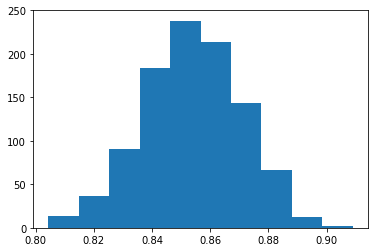

95.0 confidence interval 82.1% and 88.5%


In [61]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

<hr>
Towards the end I can say that the process we have gone through several models to find out the best scoring model interms of minimum RMSE value and Maximum R-SQUARE value. We got <b>Randon Forest Regressor</b> as our best model.

Also we did analyse the KMeans Clusters and applied polynomial features to the dataframe and tried to decrease the component with Ridge and lasso model. But even after that <b>Random Forest Regressor</b> is out best model.


So we had evaluated the Random Forest Model and compared the Training set and Validation set and Test set cross validation score. 


<b><u> Random Forest Regression Scores: </u></b>

<b>Training Data Score : 0.923938</b><br>
<b>Test Data Score : 0.876778</b>


<b>RMSE : 0.351031	<br> R-Square : 0.875683</b>


<b>So there is some major significant difference in between both scores. Specially for test data score.</b>

Then hypertune our model - 

First I executed RandomSearchCV functions to find the best parameters and user those values as the range of GridsearchCV function to get much better and accurate parameters for our Random Forest Regressor model.   

<b><u> Random Forest Regression Scores (After Hypertune): </u></b>

<b>Training Data Score : 0.951493</b><br>
<b>Test Data Score : 0.894561</b>

So after Hyper tune our model we got better result.

<h3><b>Model performance range at 95% confidence level is : 82.1% to 88.5%</b></h3>

<hr>
<b>Suggession: </b>

 * We can improve further model performance but we might need some deep learning technique for that.
 * Also we can collect some more data points for better performance as well.


### <center>============================ X ============================</center>